In [28]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from sympy.abc import x, y, z

In [29]:
class input_data:
  def __init__(this, data):
    this.input_data = data.split("\n")
    this.last_used_index = -1
  def get_input(this, question):
    this.last_used_index = this.last_used_index + 1
    if (this.last_used_index >= len(this.input_data)):
      this.input_data.append(input(question))
    else:
      print(f"""{question}{this.input_data[this.last_used_index]}""")
    return(this.input_data[this.last_used_index])

  def read_expr(this):
    expr = this.get_input("Выражение: ")
    expr = expr.replace("^", "**").replace(" ", "")
    return(sympy.parse_expr(expr))

  def read_equation(this):
    expr = this.get_input("Выражение: ")
    expr = expr.replace("^", "**").replace(" ", "")
    left_side = sympy.parse_expr(expr[0:expr.index("=")])
    right_side = sympy.parse_expr(expr[expr.index("=") + 1:])
    return(sympy.Eq(left_side, right_side))

In [30]:
def get_coeff(f, pat=None):
  if (pat == None):
    return(f.subs({x: 0, y: 0, z: 0}))
  return(f.coeff(pat).subs({x: 0, y: 0, z: 0}))

def make_matrix(f):
  if (len([*sympy.Poly(f).free_symbols]) == 3):
    #x, y, z - matrix
    return(Matrix([
      [get_coeff(f, x ** 2), get_coeff(f, x * y) / 2, get_coeff(f, x * z) / 2],
      [get_coeff(f, x * y) / 2, get_coeff(f, y ** 2), get_coeff(f, y * z) / 2],
      [get_coeff(f, x * z) / 2, get_coeff(f, y * z) / 2, get_coeff(f, z ** 2)]
    ]))
  else:
    #x, y, free - matrix
    return(Matrix([
      [get_coeff(f, x ** 2), get_coeff(f, x * y) / 2, get_coeff(f, x) / 2],
      [get_coeff(f, x * y) / 2, get_coeff(f, y ** 2), get_coeff(f, y) / 2],
      [get_coeff(f, x) / 2, get_coeff(f, y) / 2, get_coeff(f)]
    ]))

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python
## Квадратичные формы
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [31]:
user_data = input_data("""7 * (x ^ 2) + 10 * sqrt(3) * x * y - 3 * (y ^ 2) - 20 * (z ^ 2)""")
u = user_data.read_expr()
A = make_matrix(u)
display(A)
X = Matrix([x, y, z])
res = simplify(X.T * A * X)
display(Latex(f'X^T  A  X - u = {latex(res[0] - u)}'))
eigenvects = A.eigenvects()
for item in eigenvects:
    display(Latex(f'собственное\ число:\ {latex(item[0])},\ кратность:\ {item[1]},\ собственный\ вектор:\ {latex(*item[2])}'))

Выражение: 7 * (x ^ 2) + 10 * sqrt(3) * x * y - 3 * (y ^ 2) - 20 * (z ^ 2)


Matrix([
[        7, 5*sqrt(3),   0],
[5*sqrt(3),        -3,   0],
[        0,         0, -20]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [32]:
P = Matrix([])
for item in eigenvects:
    for i in range(item[1]):
      P = P.row_join(item[2][i].normalized())
A_new = simplify(P.T * A * P)
display(Eq(simplify(X.T * A_new * X)[0], 0))

Eq(-20*x**2 - 8*y**2 + 12*z**2, 0)

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

In [33]:
def get_angle(A):
  return(sympy.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2)
def rotation_matrix3d(alpha):
  return(Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]]))

def normalize_center(A):
  X = Matrix((x - A[0, 2] / A[0, 0], y - A[1, 2] / A[1, 1], 1))
  return(simplify(expand(X.T * A * X))[0])
def normalize_expr_to_eq(expr):
  expr = expr / (-expr.subs({x: 0, y: 0})) + 1
  return(simplify(Eq(expr, 1)))
  
def line_type(expr):
  expr = expr.lhs - expr.rhs
  a11 = get_coeff(expr, x ** 2)
  a22 = get_coeff(expr, y ** 2)
  a0 = get_coeff(expr)
  if (a11 * a22 > 0 and a11 * a0 < 0):
    return("ellipse")
  if (a11 * a22 < 0 and a0 != 0):
    return("hyperbola")
  if ((a11 != 0 and a22 == 0) or (a11 == 0 and a22 != 0)):
    return("parabola")

Выражение: 97 * (x ^ 2) - 144 * x * y + 97 * (y ^ 2) + 482 * x - 532 * y = 3452
Тип линии: ellipse


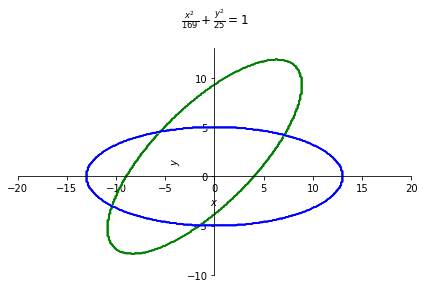

In [34]:
user_data = input_data("""97 * (x ^ 2) - 144 * x * y + 97 * (y ^ 2) + 482 * x - 532 * y = 3452""")
u = user_data.read_equation()
u = u.lhs - u.rhs

A = make_matrix(u)
X = Matrix([x, y, 1])
P = rotation_matrix3d(get_angle(A))
eq = normalize_expr_to_eq(normalize_center(P.T * A * P))
print(f"\033[95mТип линии:\033[0m {line_type(eq)}")

p = plot_implicit(u, (x, -20, 20), (y, -10, 13), aspect_ratio=(1, 1), line_color='green', xlabel='$x$', ylabel='$y$', title=f'${latex(eq)}$\n', adaptive=False, show=False)
p.extend(plot_implicit(eq, (x, -20, 20), (y, -10, 13), aspect_ratio=(1, 1), line_color='blue', adaptive=False, show=False))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

Выражение: (x ^ 2) + 2 * x * y + (y ** 2) - 4 * x + 4 * y = 4
Тип линии: parabola


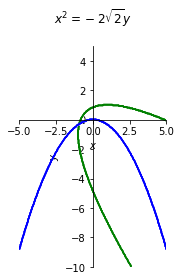

In [35]:
user_data = input_data("""(x ^ 2) + 2 * x * y + (y ** 2) - 4 * x + 4 * y = 4""")
u = user_data.read_equation()
u = u.lhs - u.rhs

A = make_matrix(u)
X = Matrix([x, y, 1])
P = rotation_matrix3d(get_angle(A))
eq = Eq((X.T * (P.T * A * P) * X)[0], 0)
eq = Eq(x ** 2, [*solveset(eq, x)][0] ** 2 - 2)
print(f"\033[95mТип линии:\033[0m {line_type(eq)}")

p = plot_implicit(u, (x, -5, 5), (y, -10, 5), aspect_ratio=(1, 1), line_color='green', xlabel='$x$', ylabel='$y$', title=f'${latex(eq)}$\n', adaptive=False, show=False)
p.extend(plot_implicit(eq, (x, -5, 5), (y, -10, 5), aspect_ratio=(1, 1), line_color='blue', adaptive=False, show=False))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

Вариант N 2

$$Q = 7446 x^{2} + 120 \sqrt{11} x y + 216 \sqrt{6} x z - 3650 y^{2} - 240 \sqrt{66} y z + 6204 z^{2}$$

In [36]:
user_data = input_data("""7446 * (x ^ 2) + 120 * sqrt(11) * x * y + 216 * sqrt(6) * x * z - 3650 * (y ^ 2) - 240 * sqrt(66) * y * z + 6204 * (z ^ 2)""")
u = user_data.read_expr()
A = make_matrix(u)
display(A)
eigenvects = A.eigenvects()
P = Matrix([])
for item in eigenvects:
    for i in range(item[1]):
      P = P.row_join(item[2][i].normalized())
X = Matrix([x, y, z])
A = P.T * A * P
display(A)
display(Eq((X.T * A * X)[0], 0))

Выражение: 7446 * (x ^ 2) + 120 * sqrt(11) * x * y + 216 * sqrt(6) * x * z - 3650 * (y ^ 2) - 240 * sqrt(66) * y * z + 6204 * (z ^ 2)


Matrix([
[       7446,   60*sqrt(11),   108*sqrt(6)],
[60*sqrt(11),         -3650, -120*sqrt(66)],
[108*sqrt(6), -120*sqrt(66),          6204]])

Matrix([
[-3750,    0,    0],
[    0, 6250,    0],
[    0,    0, 7500]])

Eq(-3750*x**2 + 6250*y**2 + 7500*z**2, 0)

In [37]:
user_data = input_data("""-14899 * (x ^ 2) - 40 * sqrt(6) * x * y - 606 * sqrt(11) * x * z - 2600 * (y ^ 2) + 120 * sqrt(66) * y * z - 5001 * (z ^ 2)""")
u = user_data.read_expr()
A = make_matrix(u)
display(A)
eigenvects = A.eigenvects()
P = Matrix([])
for item in eigenvects:
    for i in range(item[1]):
      P = P.row_join(item[2][i].normalized())
X = Matrix([x, y, z])
A = P.T * A * P
display(A)
display(Eq((X.T * A * X)[0], 0))

Выражение: -14899 * (x ^ 2) - 40 * sqrt(6) * x * y - 606 * sqrt(11) * x * z - 2600 * (y ^ 2) + 120 * sqrt(66) * y * z - 5001 * (z ^ 2)


Matrix([
[       -14899, -20*sqrt(6), -303*sqrt(11)],
[  -20*sqrt(6),       -2600,   60*sqrt(66)],
[-303*sqrt(11), 60*sqrt(66),         -5001]])

Matrix([
[-15000,     0,     0],
[     0, -5000,     0],
[     0,     0, -2500]])

Eq(-15000*x**2 - 5000*y**2 - 2500*z**2, 0)